<a href="https://colab.research.google.com/github/puckybreg/625.721-Poisson-Mixtures-Final-Project/blob/main/Probability_and_Stochastic_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import math
from nltk.corpus import brown
import numpy as np
from scipy.special import factorial
from scipy.stats import poisson, nbinom
from scipy.interpolate import make_interp_spline
nltk.download('brown')
brown.words()[:10]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [ ]:
# len(brown.paras())

brown.fileids()[:10] 

' '.join(brown.words('ca01')[:30])



"The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in"

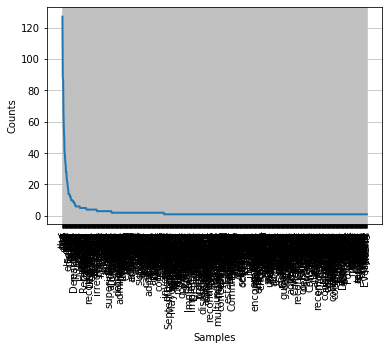

In [ ]:
# brown.words('ca01')[:5]
# for word in brown.words('ca01'): # First 5 words.

# wordtags = nltk.FreqDist(brown.words('ca01'))

# nltk.FreqDist()

# wordtags.plot()


In [ ]:
target_word = "said"
target_word_counts_per_doc = []
for doc in brown.fileids(): 
  # print(doc)
  words_in_doc = brown.words(doc)
  count_of_target_word = len([word for word in words_in_doc if word == target_word])
  # print(count_of_target_word)
  target_word_counts_per_doc.append(count_of_target_word)
print(target_word_counts_per_doc)

[24, 14, 17, 3, 31, 26, 10, 1, 22, 18, 3, 11, 7, 7, 11, 0, 2, 0, 25, 13, 21, 24, 12, 17, 18, 2, 15, 6, 0, 1, 2, 3, 6, 1, 0, 1, 9, 2, 4, 5, 1, 7, 0, 0, 1, 2, 3, 0, 2, 1, 0, 9, 4, 3, 0, 5, 1, 4, 2, 1, 1, 2, 0, 2, 0, 3, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 8, 2, 0, 1, 1, 0, 0, 0, 2, 6, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 3, 0, 1, 0, 0, 6, 4, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 10, 3, 4, 0, 0, 0, 4, 16, 2, 3, 0, 9, 3, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 1, 3, 0, 1, 0, 0, 0, 4, 0, 1, 0, 0, 9, 2, 0, 1, 2, 0, 0, 1, 0, 0, 6, 0, 0, 0, 1, 11, 0, 7, 0, 5, 0, 2, 2, 9, 2, 1, 1, 0, 10, 1, 7, 1, 3, 0, 3, 2, 3, 9, 1, 0, 1, 3, 2, 3, 2, 1, 1, 1, 0, 8, 8, 0, 0, 1, 0, 3, 0, 0, 6, 0, 0, 1, 0, 3, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,

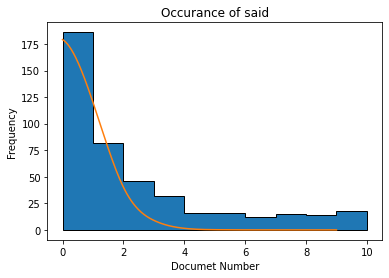

In [ ]:
plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])
# plt.plot(target_word_counts_per_doc)
plt.xlabel('Documet Number')
plt.ylabel('Frequency')
plt.title(f'Occurance of {target_word}')

# Interesting question about the merits of doing modeling work against a graph where the X-axis is the frequency of target word. Vs. What Church and Gale did which was to instead make the X-Axis the document number

# Poisson Distribution
# creating a numpy array for x-axis
x = np.arange(0, 10, 1)

# poisson distribution data for y-axis
y = poisson.pmf(x, mu=0.67)

X_Y_Spline = make_interp_spline(x, y*350)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)

# Negative Binomial Distribution
n = 1.17
p = 0.45

y = nbinom.pmf(x, n, p)
print(y)
X_Y_Spline = make_interp_spline(x, y*376)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)



plt.show()

[0 1 2 3 4 5 6 7 8 9]
[0.39287884 0.25281753 0.15086886 0.08767995 0.05027349 0.02859054
 0.01617033 0.00910967 0.00511679 0.00286739]


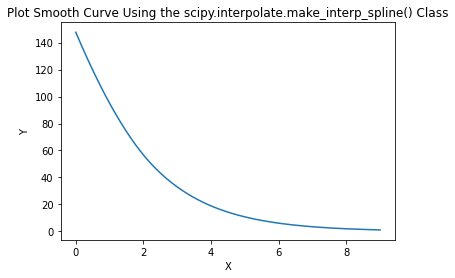

In [ ]:
# creating a numpy array for x-axis
x = np.arange(0, 10, 1)
n = 1.17
p = 0.45
# x = np.arange(nbinom.ppf(0.01, n, p),
              # nbinom.ppf(0.99, n, p))
print(x)
# poisson distribution data for y-axis
y = nbinom.pmf(x, n, p)
print(y)
X_Y_Spline = make_interp_spline(x, y*376)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
X_Y_Spline([4,5,6])

array([18.90283377, 10.75004156,  6.08004434])